IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


READ A CSV FILE

In [2]:
data = pd.read_csv("Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


DATA CLEANING

I) Drop Unwanted columns

In [3]:
data.drop(["EmployeeNumber","EnvironmentSatisfaction","EmployeeCount","HourlyRate","MonthlyRate","NumCompaniesWorked","Over18","PercentSalaryHike","RelationshipSatisfaction","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsSinceLastPromotion","YearsWithCurrManager"],axis=1,inplace = True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,YearsAtCompany,YearsInCurrentRole
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,3,2,Sales Executive,4,Single,5993,Yes,3,6,4
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,2,2,Research Scientist,2,Married,5130,No,4,10,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,2,1,Laboratory Technician,3,Single,2090,Yes,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,3,1,Research Scientist,3,Married,2909,Yes,3,8,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,3,1,Laboratory Technician,2,Married,3468,No,3,2,2


II) Check Missing Values

In [4]:
data.isnull().sum()

Age                   0
Attrition             0
BusinessTravel        0
DailyRate             0
Department            0
DistanceFromHome      0
Education             0
EducationField        0
Gender                0
JobInvolvement        0
JobLevel              0
JobRole               0
JobSatisfaction       0
MaritalStatus         0
MonthlyIncome         0
OverTime              0
PerformanceRating     0
YearsAtCompany        0
YearsInCurrentRole    0
dtype: int64

In [5]:
# object column encoding

data.select_dtypes(include= "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [7]:
le = LabelEncoder()

for i in data.select_dtypes(include= "object").columns:
    data[i] = le.fit_transform(data[i])

In [8]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,YearsAtCompany,YearsInCurrentRole
0,41,1,2,1102,2,1,2,1,0,3,2,7,4,2,5993,1,3,6,4
1,49,0,1,279,1,8,1,1,1,2,2,6,2,1,5130,0,4,10,7
2,37,1,2,1373,1,2,2,4,1,2,1,2,3,2,2090,1,3,0,0
3,33,0,1,1392,1,3,4,1,0,3,1,6,3,1,2909,1,3,8,7
4,27,0,2,591,1,2,1,3,1,3,1,2,2,1,3468,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,4,2,2,4,1,2571,0,3,5,2
1466,39,0,2,613,1,6,1,3,1,2,3,0,1,1,9991,0,3,7,7
1467,27,0,2,155,1,4,3,1,1,4,2,4,2,1,6142,1,4,6,2
1468,49,0,1,1023,2,2,3,3,1,2,2,7,2,1,5390,0,3,9,6


In [9]:
data1 = data[["Age","Attrition","BusinessTravel","Department","Gender","JobSatisfaction","MaritalStatus","MonthlyIncome","OverTime","YearsAtCompany"]]
data2 = data[["DailyRate","DistanceFromHome","Education","EducationField","JobInvolvement","JobLevel","JobRole","MonthlyIncome","PerformanceRating","YearsAtCompany","YearsInCurrentRole"]]


In [10]:
data1

,Age,Attrition,BusinessTravel,Department,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany
0,41,1,2,2,0,4,2,5993,1,6
1,49,0,1,1,1,2,1,5130,0,10
2,37,1,2,1,1,3,2,2090,1,0
3,33,0,1,1,0,3,1,2909,1,8
4,27,0,2,1,1,2,1,3468,0,2
...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,1,1,4,1,2571,0,5
1466,39,0,2,1,1,1,1,9991,0,7
1467,27,0,2,1,1,2,1,6142,1,6
1468,49,0,1,2,1,2,1,5390,0,9


In [11]:
data2

,DailyRate,DistanceFromHome,Education,EducationField,JobInvolvement,JobLevel,JobRole,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsInCurrentRole
0,1102,1,2,1,3,2,7,5993,3,6,4
1,279,8,1,1,2,2,6,5130,4,10,7
2,1373,2,2,4,2,1,2,2090,3,0,0
3,1392,3,4,1,3,1,6,2909,3,8,7
4,591,2,1,3,3,1,2,3468,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,2,3,4,2,2,2571,3,5,2
1466,613,6,1,3,2,3,0,9991,3,7,7
1467,155,4,3,1,4,2,4,6142,4,6,2
1468,1023,2,3,3,2,2,7,5390,3,9,6


I) EMPLOYEE ATTRITION

In [12]:
data1['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [15]:
data1['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

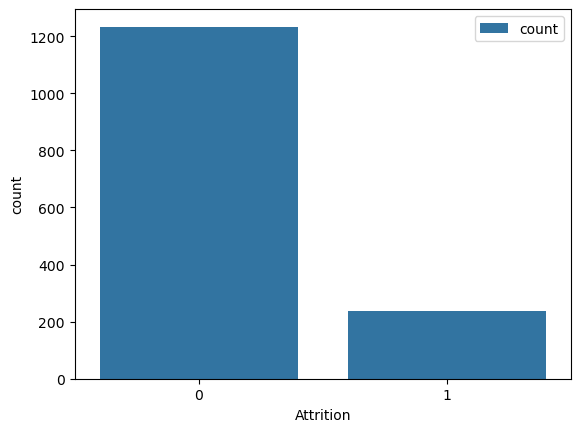

In [16]:
#Visualize the count
sns.countplot(x=data1['Attrition'], label="count", orient='h')

In [17]:
# Get the percentage distribution of categories
distribution = data1['Attrition'].value_counts(normalize=True) * 100
print(distribution)

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [18]:
data1.corr()

,Age,Attrition,BusinessTravel,Department,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany
Age,1.000000,-0.159205,0.024751,-0.031882,-0.036311,-0.004892,-0.095029,0.497855,0.028062,0.311309
Attrition,-0.159205,1.000000,0.000074,0.063991,0.029453,-0.103481,0.162070,-0.159840,0.246118,-0.134392
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,-0.032981,-0.033962,0.024001,0.034319,0.016543,-0.014575
Department,-0.031882,0.063991,-0.009044,1.000000,-0.041583,0.021001,0.056073,0.053130,0.007481,0.022920
Gender,-0.036311,0.029453,-0.032981,-0.041583,1.000000,0.033252,-0.047183,-0.031858,-0.041924,-0.029747
JobSatisfaction,-0.004892,-0.103481,-0.033962,0.021001,0.033252,1.000000,0.024360,-0.007157,0.024539,-0.003803
MaritalStatus,-0.095029,0.162070,0.024001,0.056073,-0.047183,0.024360,1.000000,-0.075450,-0.017521,-0.059986
MonthlyIncome,0.497855,-0.159840,0.034319,0.053130,-0.031858,-0.007157,-0.075450,1.000000,0.006089,0.514285
OverTime,0.028062,0.246118,0.016543,0.007481,-0.041924,0.024539,-0.017521,0.006089,1.000000,-0.011687
YearsAtCompany,0.311309,-0.134392,-0.014575,0.022920,-0.029747,-0.003803,-0.059986,0.514285,-0.011687,1.000000


<Axes: >

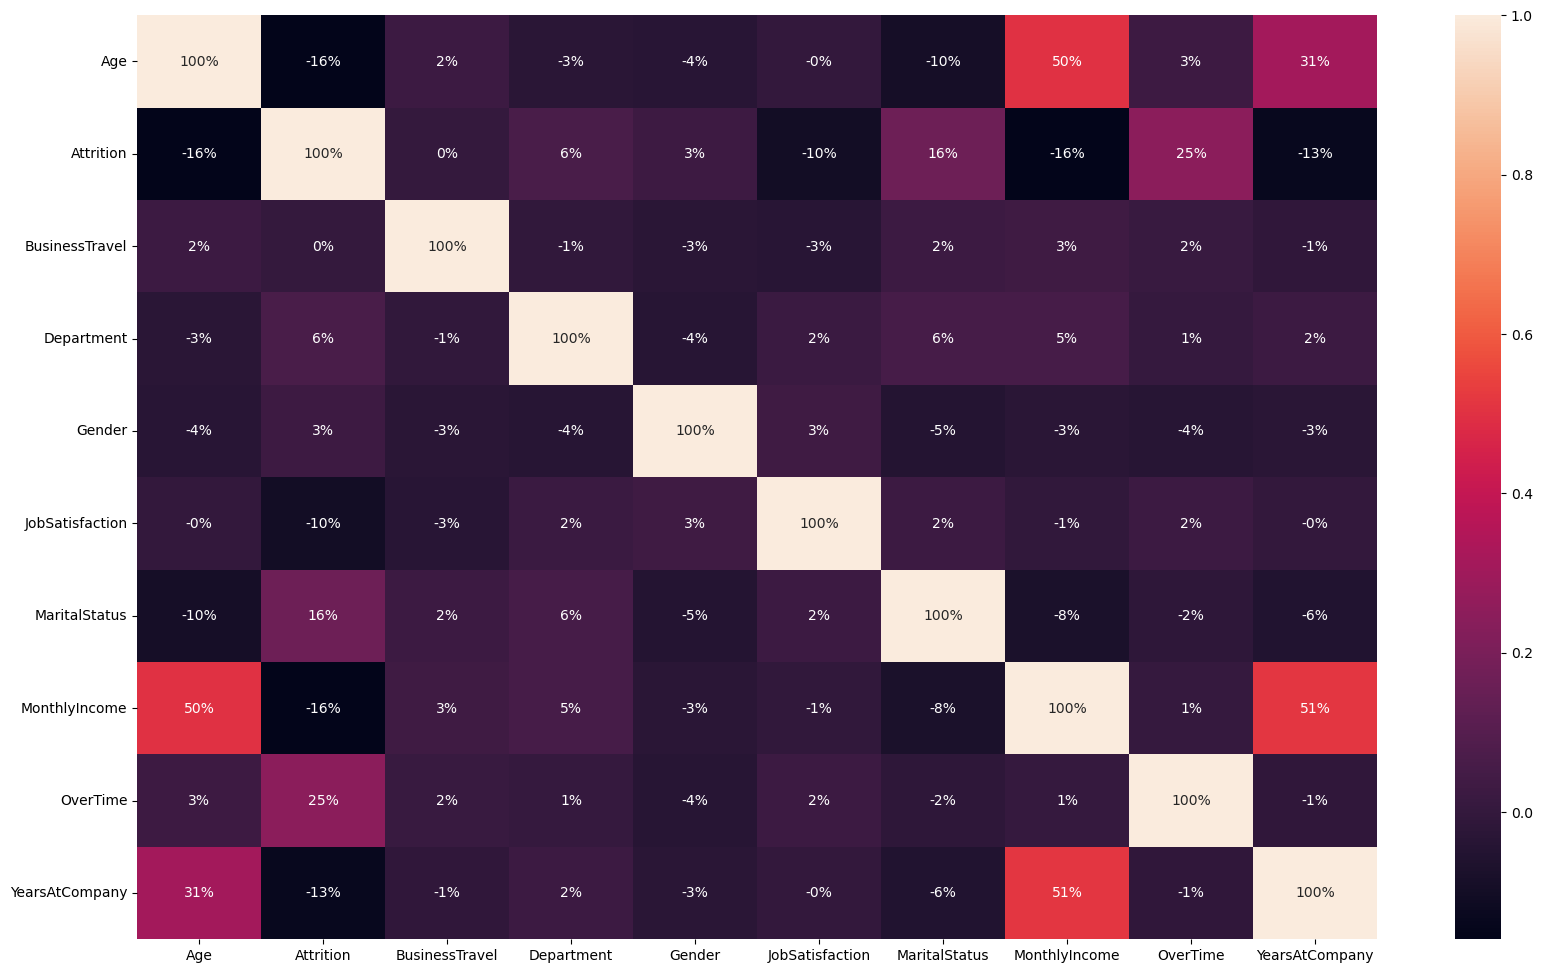

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(data1.corr(),annot=True,fmt='.0%')

In [20]:
x = data1.drop(['Attrition'],axis = 1)

y = data1['Attrition']

In [21]:
x.head()

,Age,BusinessTravel,Department,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany
0,41,2,2,0,4,2,5993,1,6
1,49,1,1,1,2,1,5130,0,10
2,37,2,1,1,3,2,2090,1,0
3,33,1,1,0,3,1,2909,1,8
4,27,2,1,1,2,1,3468,0,2


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

In [24]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


LOGISTIC REGRESSION

In [25]:
log = LogisticRegression()
log.fit(x_train,y_train)
train_score = log.score(x_train, y_train)
#make predictions
y_pred = log.predict(x_test)

In [38]:
print('Logitic Regression  \n')
print(classification_report(y_test,y_pred))

Logitic Regression  

              precision    recall  f1-score   support

           3       0.88      1.00      0.94       260
           4       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294



II) PERFORMANCE RATING

In [26]:
data2['PerformanceRating']

0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

In [47]:
data2['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

<Axes: xlabel='PerformanceRating', ylabel='count'>

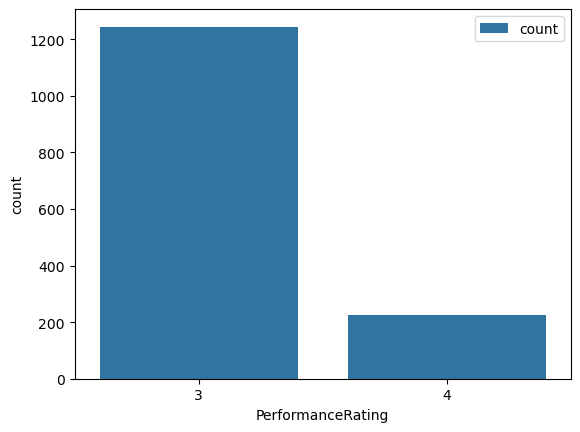

In [27]:
#Visualize the count
sns.countplot(x=data2['PerformanceRating'], label="count", orient='h')

In [28]:
# Get the percentage distribution of categories
distribution = data2['PerformanceRating'].value_counts(normalize=True) * 100
print(distribution)

PerformanceRating
3    84.62585
4    15.37415
Name: proportion, dtype: float64


In [29]:
data2.corr()

,DailyRate,DistanceFromHome,Education,EducationField,JobInvolvement,JobLevel,JobRole,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsInCurrentRole
DailyRate,1.000000,-0.004985,-0.016806,0.037709,0.046135,0.002966,-0.009472,0.007707,0.000473,-0.034055,0.009932
DistanceFromHome,-0.004985,1.000000,0.021042,0.002013,0.008783,0.005303,-0.001015,-0.017014,0.027110,0.009508,0.018845
Education,-0.016806,0.021042,1.000000,-0.039592,0.042438,0.101589,0.004236,0.094961,-0.024539,0.069114,0.060236
EducationField,0.037709,0.002013,-0.039592,1.000000,-0.002655,-0.044933,0.015599,-0.041070,-0.005614,-0.018692,-0.010506
JobInvolvement,0.046135,0.008783,0.042438,-0.002655,1.000000,-0.012630,0.006616,-0.015271,-0.029071,-0.021355,0.008717
JobLevel,0.002966,0.005303,0.101589,-0.044933,-0.012630,1.000000,-0.085457,0.950300,-0.021222,0.534739,0.389447
JobRole,-0.009472,-0.001015,0.004236,0.015599,0.006616,-0.085457,1.000000,-0.093951,-0.024233,-0.083657,-0.028354
MonthlyIncome,0.007707,-0.017014,0.094961,-0.041070,-0.015271,0.950300,-0.093951,1.000000,-0.017120,0.514285,0.363818
PerformanceRating,0.000473,0.027110,-0.024539,-0.005614,-0.029071,-0.021222,-0.024233,-0.017120,1.000000,0.003435,0.034986
YearsAtCompany,-0.034055,0.009508,0.069114,-0.018692,-0.021355,0.534739,-0.083657,0.514285,0.003435,1.000000,0.758754


<Axes: >

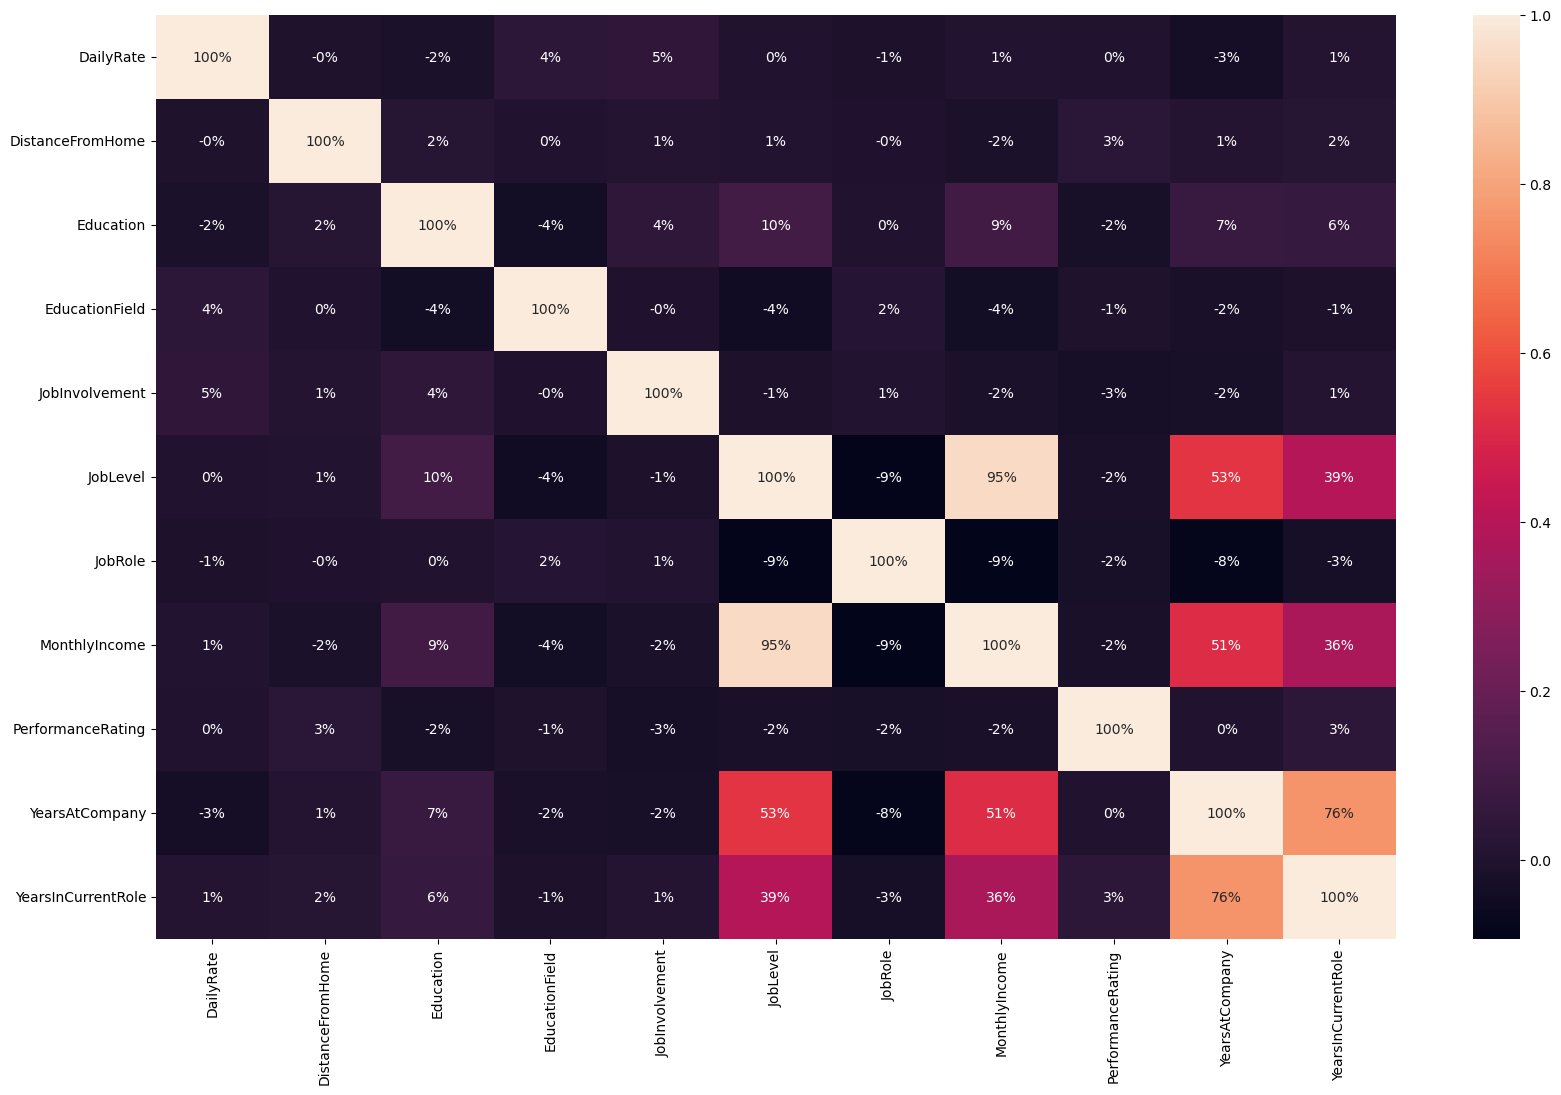

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(data2.corr(),annot=True,fmt='.0%')

In [31]:
x = data2.drop(['PerformanceRating'],axis = 1)

y = data2['PerformanceRating']

In [32]:
x.head()

,DailyRate,DistanceFromHome,Education,EducationField,JobInvolvement,JobLevel,JobRole,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,1102,1,2,1,3,2,7,5993,6,4
1,279,8,1,1,2,2,6,5130,10,7
2,1373,2,2,4,2,1,2,2090,0,0
3,1392,3,4,1,3,1,6,2909,8,7
4,591,2,1,3,3,1,2,3468,2,2


In [33]:
y.head()

0    3
1    4
2    3
3    3
4    3
Name: PerformanceRating, dtype: int64

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

In [35]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


LOGISTIC REGRESSION

In [36]:
log = LogisticRegression()
log.fit(x_train,y_train)
train_score = log.score(x_train, y_train)
#make predictions
y_pred = log.predict(x_test)

In [37]:
print('Logitic Regression  \n')
print(classification_report(y_test,y_pred))

Logitic Regression  

              precision    recall  f1-score   support

           3       0.88      1.00      0.94       260
           4       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294

